In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
np.random.seed(0)
x = np.linspace(0, 10, 50)
y = 2 * x + 1 + np.random.normal(scale=3, size=x.shape)  # y is a linear function of x with random noise

data = pd.DataFrame({"x": x, "y": y})

data.head()

,x,y
0,0.000000,6.292157
1,0.204082,2.608635
2,0.408163,4.752540
3,0.612245,8.947169
4,0.816327,8.235327


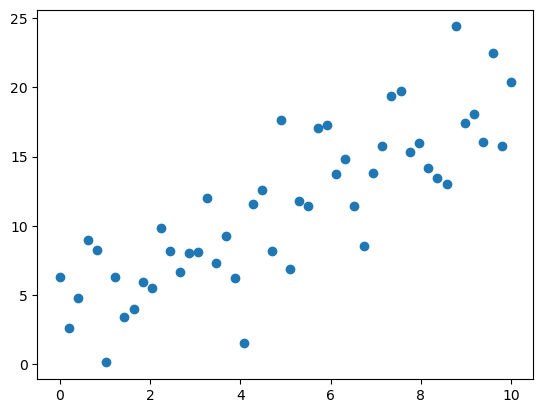

In [6]:
plt.scatter(data["x"], data["y"])

In [7]:
data.mean()

x     5.000000
y    11.421678
dtype: float64

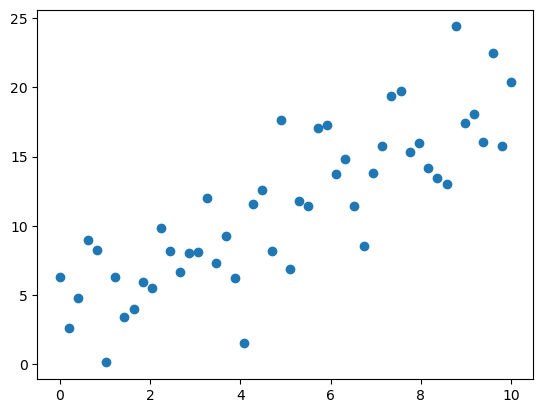

In [ ]:
plt.scatter(data["x"], data["y"])

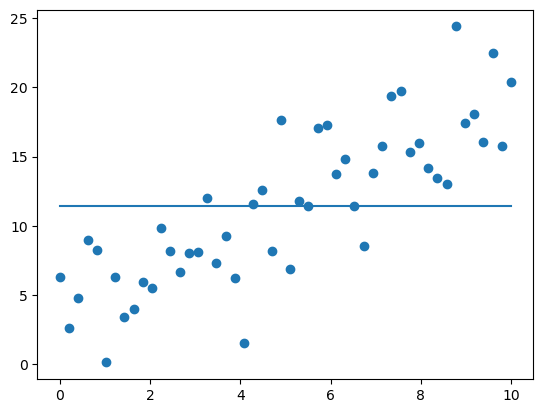

In [22]:
#lets do some assumptions, create some f_hat, 
# where intercept - the mean of y, slope is 0

x_hat = data["x"]
y_hat = 0 * x_hat + data["y"].mean()  # ax + b

plt.scatter(data["x"], data["y"])
plt.plot(x_hat, y_hat)


In [23]:
#so, we have some line - f_hat, and we want to discover if this model fits 
# good the data, in order to figure out this, kets compute the sum of squared residuals

def sum_of_square_residuals(f_hat, data):
  sq_res = 0
  
  for i in range(len(data)):
    sq_res += (data["y"][i] - f_hat["y"][i]) ** 2
  
  return sq_res

In [30]:
f_hat = pd.DataFrame({"x": x_hat, "y": y_hat})


In [29]:
sum_of_square_residuals(f_hat, data)

1570.1348388624447

In [31]:
def least_squares(x, y):
  betta_1 = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean())**2)
  betta_0 = y.mean() - betta_1 * x.mean()
  
  return [betta_1, betta_0]

B1:  1.576513252102944
B0:  3.539111556424574
Sum of residuals: 492.28538531766344


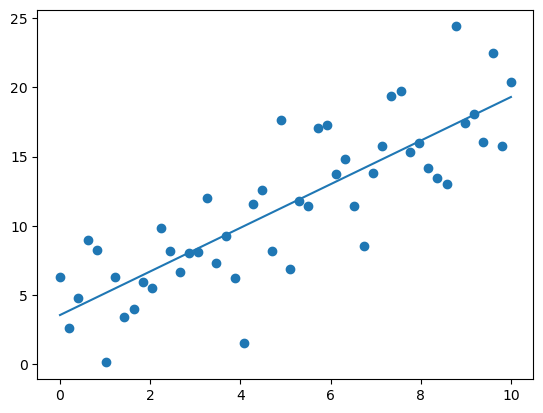

In [ ]:
betta_1, betta_0 = least_squares(data["x"], data["y"])
betta_1_fake, betta_0_fake = least_squares(data.drop(index=[20, 40], axis=0)["x"], data.drop(index=[20, 40], axis=0)["y"])

print("B1: ", betta_1)
print("B0: ", betta_0)

x_hat = data["x"]
y_hat = betta_0 + betta_1 * x_hat
f_hat = pd.DataFrame({"x": x_hat, "y": y_hat})

print("Sum of residuals:", sum_of_square_residuals(f_hat, data))

plt.scatter(data["x"], data["y"])
plt.plot(x_hat, y_hat)
